In [ ]:
!pip install -q transformers tweepy wordcloud matplotlib

In [4]:
!pip install --upgrade tweepy
import tweepy

# Add Twitter API key and secret
consumer_key = "IuFfJpfLXurFdWTcGrDrC8HLn"
consumer_secret = "WS9eyVG6b1DpMAiRNmPCFROarfc2JWuAlBz0xE6J4SNYYL5nnh"

# Handling authentication with Twitter
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

# Create a wrapper for the Twitter API
api = tweepy.API(auth, wait_on_rate_limit=True)


In [7]:
# Helper function for handling pagination in our search and handle rate limits
def limit_handled(cursor):
   while True:
       try:
           yield cursor.next()
       except tweepy.RateLimitError:
           print('Reached rate limit. Sleeping for >15 minutes')
           time.sleep(15 * 61)
       except StopIteration:
           break

# Define the term you will be using for searching tweets
query = '#NFTs'
query = query + ' -filter:retweets'

# Define how many tweets to get from the Twitter API
count = 1000

# Let's search for tweets using Tweepy
search = tweepy.Cursor(api.search_tweets,
                       q=query,
                       tweet_mode='extended',
                       lang='en',
                       result_type="recent").items(count)

In [ ]:
%pip install tensorflow
%pip install torch

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
from transformers import pipeline

# Set up the inference pipeline using a model from the 🤗 Hub
sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

# Let's run the sentiment analysis on each tweet
tweets = []
for tweet in search:
   try:
     content = tweet.full_text
     sentiment = sentiment_analysis(content)
     tweets.append({'tweet': content, 'sentiment': sentiment[0]['label']})
 
   except:
     pass

# Load the data into a DataFrame
df = pd.DataFrame(tweets)
pd.set_option('display.max_colwidth', None)

# Show a tweet for each sentiment
display(df[df["sentiment"] == 'POS'].head(1))
display(df[df["sentiment"] == 'NEU'].head(1))
display(df[df["sentiment"] == 'NEG'].head(1))

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Token indices sequence length is longer than the specified maximum sequence length for this model (131 > 128). Running this sequence through the model will result in indexing errors


,tweet,sentiment
22,@VoltageVoyagers Follow &amp; Follow Back🦋🦋🦋\n\n#NFT #NFTs #NFTCommunity #nftart #NFTCollection #Web3 #love #hope #positivity #life #beauty #NFTsales #NFTCommumity #metaverse #NFTartists #NFTgirls #WomaninNFT #NFTwomen #WomenInNFTs\n\nhttps://t.co/79moSCPffL,POS


,tweet,sentiment
0,wtf i just got 395$ from this airdrop #Ethereum #BAYC #NFTs #bitcoin AAVE $XRP #ETH #Binance Optimism $PSYOP $LOYAL Matic #AVAX #crypto #APE #Coinbase $LTC $ADA $RNDR $BNB Polygon $FLOKI #BTC ZkSync Lido https://t.co/Dr1hT4gadR,NEU


,tweet,sentiment
146,$FEAR #BuyAndHold or #Long NOW‼\n🐂 55.45% 🐻 44.55%\n✋ StopLoss: 0.0645\n🎯 0.0648\n🎯 0.0653\n#Fear #NFT #NFTs #NFTCommunity #OracleEasy #NFTtrader #Web3\nNot financial advice. Do your own research.,NEG


sentiment
NEG      3
NEU    178
POS     35
dtype: int64


<AxesSubplot:>

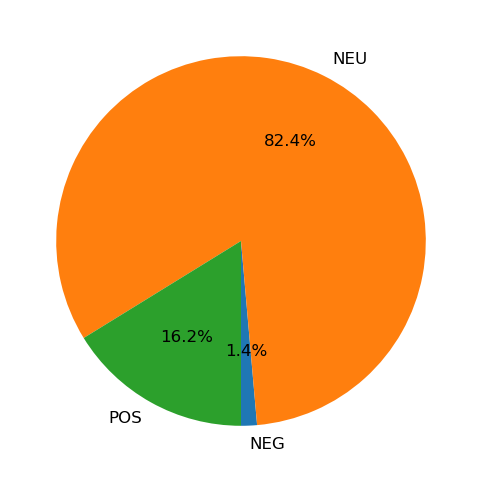

In [10]:
import matplotlib.pyplot as plt
# Let's count the number of tweets by sentiments
sentiment_counts = df.groupby(['sentiment']).size()
print(sentiment_counts)

# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

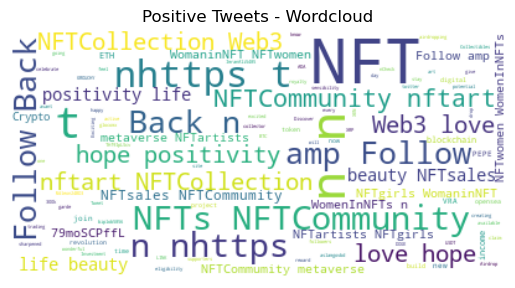

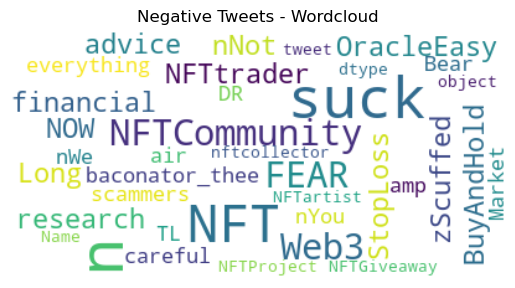

In [11]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
# Wordcloud with positive tweets
positive_tweets = df['tweet'][df["sentiment"] == 'POS']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
 
# Wordcloud with negative tweets
negative_tweets = df['tweet'][df["sentiment"] == 'NEG']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [61]:
import tweepy
from sklearn.metrics import accuracy_score
import pandas as pd
from transformers import pipeline

# Add Twitter API key and secret
consumer_key = "IuFfJpfLXurFdWTcGrDrC8HLn"
consumer_secret = "WS9eyVG6b1DpMAiRNmPCFROarfc2JWuAlBz0xE6J4SNYYL5nnh"

# Handling authentication with Twitter
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

# Create a wrapper for the Twitter API
api = tweepy.API(auth, wait_on_rate_limit=True)

# Set up the inference pipeline using the BERTweet sentiment analysis model
sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

# Fetch tweets from the Twitter API
query = 'YOUR_SEARCH_QUERY'  # Replace with your desired search query
count = 1000  # Number of tweets to fetch
search = tweepy.Cursor(api.search_tweets,
                       q=query,
                       tweet_mode='extended',
                       lang='en',
                       result_type="recent").items(count)

# Initialize lists to store predicted and true labels
predicted_labels = []
true_labels = []

# Iterate through the fetched tweets
for tweet in search:
    content = tweet.full_text
    true_label = 'NEU'  # Replace with the true sentiment label of the tweet

    # Truncate or truncate-and-pad the input sequence
    max_sequence_length = 128  # Maximum sequence length allowed by the model
    if len(content) > max_sequence_length:
        content = content[:max_sequence_length]  # Truncate the sequence
    elif len(content) < max_sequence_length:
        content = content + " " * (max_sequence_length - len(content))  # Pad the sequence
    
    # Perform sentiment analysis prediction on the tweet
    sentiment_predictions = sentiment_analysis(content)
    
    # Check if sentiment_predictions list is not empty
    if sentiment_predictions:
        prediction = sentiment_predictions[0]['label']
    else:
        prediction = 'UNKNOWN'  # Set a default label if no prediction is available

    # Append predicted and true labels to respective lists
    predicted_labels.append(prediction)
    true_labels.append(true_label)

# Calculate the accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Print the accuracy
print("Accuracy:", accuracy)


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


Accuracy: 0.7536534446764092
